> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDB, finding the most successful Production Company and Director

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For my project I want to see what is the most succesful production company and who is the most successful director. For the production company, I will be seeing which company is the most profitable. However, for the director, I will just be looking at revenue, as the budget spent on the production isn't being spent by the director.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

## Data Cleaning
1. Add a profit column, taking the budget_adj column and subtracting it from the revenue_adj column
2. Drop any uneccessary columns
3. Drop the rows where budget_adj and revenue_adj are equal to zero as there is not enough info


In [5]:
# create profit column
profit = df.revenue - df.budget
df2 = df.assign(profit = df.revenue_adj - df.budget_adj)

In [6]:
#drop the columns that don't pertain to the subject
df2.drop(['homepage', 'overview', 'tagline', 'keywords', 'release_date', 'cast'], axis=1, inplace=True)

In [7]:
#drop the data that doesn't have enough info
df2.drop(df2.index[df2['revenue_adj'] == 0], inplace = True)
df2.drop(df2.index[df2['budget_adj'] == 0], inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which Production Companies are the most profitable?

In [8]:
#Split the oridcution companies into their individual rows
def count_pc(x):
    #concatenate all the rows of the production companies.
    data_plot = df2[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #counts each of the genre and return.
    count = data.value_counts(ascending=False)
    return count
#Now call the function for counting the movies of each production company.
pc = count_pc('production_companies')
print(pc)

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
                                         ... 
Pennebaker Productions                      1
Flan de Coco Films                          1
Aggregate Film                              1
Pro-ject Filmproduktion                     1
JRS Productions                             1
Length: 3265, dtype: int64


In [9]:
#Create a separate DataFrame for for Production companies that have produced 50 or more films
Prod_Comp = pd.DataFrame(pc)
Prod_Comp = Prod_Comp.reset_index()
Prod_Comp.columns = ['company','count']
count_new = Prod_Comp[Prod_Comp['count'] > 50]
print(count_new)

                                   company  count
0                       Universal Pictures    329
1                             Warner Bros.    324
2                       Paramount Pictures    270
3   Twentieth Century Fox Film Corporation    201
4                        Columbia Pictures    178
5                          New Line Cinema    152
6                     Walt Disney Pictures    117
7                      Touchstone Pictures    116
8                Metro-Goldwyn-Mayer (MGM)    109
9                         Relativity Media    102
10           Columbia Pictures Corporation    101
11                           Miramax Films     83
12                        TriStar Pictures     75
13               Village Roadshow Pictures     74
14                          DreamWorks SKG     73
15                     Regency Enterprises     69
16                         Dimension Films     51


In [10]:
#Merge the two dataframes
df_combined = df2.merge(count_new, left_on='production_companies', right_on='company', how='inner')
df_combined.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,company,count
0,239571,tt1972779,1.630150,26000000,35926213,The Best of Me,Michael Hoffman,117,Drama|Romance,Relativity Media,535,7.2,2014,2.394837e+07,3.309131e+07,9.142946e+06,Relativity Media,102
1,241771,tt3125324,0.398601,7000000,14618727,Beyond the Lights,Gina Prince-Bythewood,116,Drama,Relativity Media,95,6.9,2014,6.447637e+06,1.346518e+07,7.017541e+06,Relativity Media,102
2,37931,tt1470023,0.649290,10000000,6110000,MacGruber,Jorma Taccone,90,Action|Adventure|Comedy,Relativity Media,95,5.2,2010,1.000000e+07,6.110000e+06,-3.890000e+06,Relativity Media,102
3,70436,tt1486192,1.169815,26000000,29657751,The Raven,James McTeigue,111,Thriller,Relativity Media,224,6.0,2012,2.469335e+07,2.816728e+07,3.473928e+06,Relativity Media,102
4,209451,tt1742044,0.797723,40000000,67347013,Jersey Boys,Clint Eastwood,134,Music|Drama,Warner Bros.,181,6.7,2014,3.684364e+07,6.203273e+07,2.518909e+07,Warner Bros.,324


In [11]:
top_company = df_combined.groupby('company')['profit'].sum().sort_values(ascending = False).head(16)

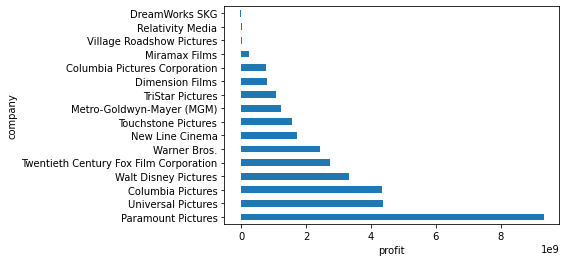

In [12]:
top_company.plot.barh()
plt.xlabel('profit')
plt.show()

### Which Directors have made the most money per film?

In [13]:
# Find the total Director count
df2.director.value_counts()

Steven Spielberg                  27
Clint Eastwood                    24
Ridley Scott                      21
Woody Allen                       18
Martin Scorsese                   17
                                  ..
Jimmy T. Murakami                  1
Scott Moore|Jon Lucas              1
Jeffrey Nachmanoff                 1
Steve Hickner|Simon J. Smith       1
Don Michael Paul|Bibo Bergeron     1
Name: director, Length: 1713, dtype: int64

In [14]:
def count_director(x):
    #concatenate all the rows of the production companies.
    data_plot = df2[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #counts each of the genre and return.
    count = data.value_counts(ascending=False)
    return count
#Now call the function for counting the movies of each production company.
dir = count_director('director')
print(dir)

Steven Spielberg    28
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Robert Rodriguez    17
                    ..
Craig McCracken      1
Mort Nathan          1
Costa-Gavras         1
Clyde Geronimi       1
Angela Robinson      1
Length: 1785, dtype: int64


In [15]:
#Create a Dataframe dor Director count
director = pd.DataFrame(dir)
director = director.reset_index()
director.columns = ['director','count']
count_new2 = director[director['count'] > 10]
print(count_new2)

                director  count
0       Steven Spielberg     28
1         Clint Eastwood     24
2           Ridley Scott     21
3            Woody Allen     18
4       Robert Rodriguez     17
5      Steven Soderbergh     17
6             Tim Burton     17
7        Martin Scorsese     17
8        Robert Zemeckis     15
9           Oliver Stone     15
10          Renny Harlin     15
11        Brian De Palma     15
12            Wes Craven     14
13            Ron Howard     14
14       Joel Schumacher     14
15            Tony Scott     14
16  Francis Ford Coppola     13
17        Peter Farrelly     13
18        Richard Donner     13
19        John Carpenter     12
20           Walter Hill     12
21        Barry Levinson     12
22             Joel Coen     12
23     Quentin Tarantino     12
24            Rob Reiner     12
25        Bobby Farrelly     11
26           Kevin Smith     11
27           Michael Bay     11
28             Spike Lee     11
29           John Landis     11
30      

In [16]:
#Merge the director dataframe with the original dataframe
df_combined = df.merge(count_new2, left_on='director', right_on='director', how='inner')
df_combined.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count
0,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,21
1,147441,tt1528100,3.813740,140000000,268031828,Exodus: Gods and Kings,Christian Bale|Joel Edgerton|John Turturro|Aar...,http://www.exodusgodsandkings.com/,Ridley Scott,"Once brothers, now enemies.",...,153,Adventure|Drama|Action,Scott Free Productions|Chernin Entertainment|B...,12/3/14,1377,5.6,2014,1.289527e+08,2.468817e+08,21
2,19067,tt0075968,0.400457,900000,0,The Duellists,Keith Carradine|Harvey Keitel|Albert Finney|Ro...,NaN,Ridley Scott,Fencing is a science. Loving is a passion. Due...,...,100,Drama|War,Enigma Productions,8/31/77,31,5.9,1977,3.238003e+06,0.000000e+00,21
3,20662,tt0955308,2.118310,200000000,310669540,Robin Hood,Russell Crowe|Cate Blanchett|Mark Strong|Oscar...,http://www.robinhoodthemovie.com/,Ridley Scott,"Rise and rise again, until lambs become lions.",...,140,Action,Imagine Entertainment|Universal Pictures|Scott...,5/12/10,844,6.1,2010,2.000000e+08,3.106695e+08,21
4,855,tt0265086,1.735123,92000000,172989651,Black Hawk Down,Josh Hartnett|Ewan McGregor|Jason Isaacs|Tom S...,NaN,Ridley Scott,Leave No Man Behind.,...,144,Action|History|War,Jerry Bruckheimer Films|Revolution Studios|Sco...,12/28/01,1201,7.1,2001,1.132969e+08,2.130347e+08,21


In [17]:
# Sort the director values, find the average they make 
top_director = df_combined.groupby('director')['revenue_adj'].mean().sort_values(ascending = False)
top_director.head(15)

director
Peter Jackson           5.399883e+08
Steven Spielberg        5.242223e+08
Michael Bay             4.964247e+08
Peter Farrelly          3.637697e+08
Robert Zemeckis         3.326852e+08
Tim Burton              2.383834e+08
Brett Ratner            2.134328e+08
Richard Donner          2.096325e+08
Ron Howard              2.057771e+08
Tony Scott              1.972784e+08
Ridley Scott            1.834594e+08
Francis Ford Coppola    1.567452e+08
Quentin Tarantino       1.526842e+08
John Landis             1.145666e+08
Steven Soderbergh       1.125124e+08
Name: revenue_adj, dtype: float64

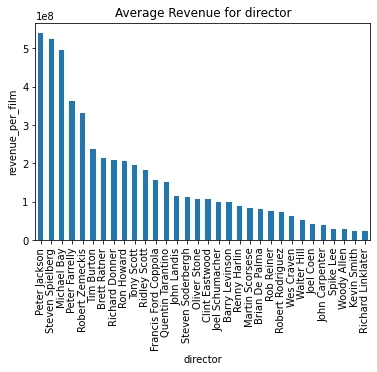

In [18]:
#Create a bar chart of directors
top_director.plot.bar()
plt.xlabel('director')
plt.ylabel('revenue_per_film')
plt.title('Average Revenue for director')
plt.show()

In [19]:
top_director.groupby(['director']).describe()

,count,mean,std,min,25%,50%,75%,max
director,,,,,,,,
Barry Levinson,1.0,9.973142e+07,NaN,9.973142e+07,9.973142e+07,9.973142e+07,9.973142e+07,9.973142e+07
Brett Ratner,1.0,2.134328e+08,NaN,2.134328e+08,2.134328e+08,2.134328e+08,2.134328e+08,2.134328e+08
Brian De Palma,1.0,8.247938e+07,NaN,8.247938e+07,8.247938e+07,8.247938e+07,8.247938e+07,8.247938e+07
Clint Eastwood,1.0,1.076379e+08,NaN,1.076379e+08,1.076379e+08,1.076379e+08,1.076379e+08,1.076379e+08
Francis Ford Coppola,1.0,1.567452e+08,NaN,1.567452e+08,1.567452e+08,1.567452e+08,1.567452e+08,1.567452e+08
Joel Coen,1.0,4.277803e+07,NaN,4.277803e+07,4.277803e+07,4.277803e+07,4.277803e+07,4.277803e+07
Joel Schumacher,1.0,9.975845e+07,NaN,9.975845e+07,9.975845e+07,9.975845e+07,9.975845e+07,9.975845e+07
John Carpenter,1.0,4.001601e+07,NaN,4.001601e+07,4.001601e+07,4.001601e+07,4.001601e+07,4.001601e+07
John Landis,1.0,1.145666e+08,NaN,1.145666e+08,1.145666e+08,1.145666e+08,1.145666e+08,1.145666e+08


In [21]:
df_scatter = df_combined.merge(top_director, left_on='director', right_on='director', how='inner')
df_scatter.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj_x,count,revenue_adj_y
0,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,21,1.834594e+08
1,147441,tt1528100,3.813740,140000000,268031828,Exodus: Gods and Kings,Christian Bale|Joel Edgerton|John Turturro|Aar...,http://www.exodusgodsandkings.com/,Ridley Scott,"Once brothers, now enemies.",...,Adventure|Drama|Action,Scott Free Productions|Chernin Entertainment|B...,12/3/14,1377,5.6,2014,1.289527e+08,2.468817e+08,21,1.834594e+08
2,19067,tt0075968,0.400457,900000,0,The Duellists,Keith Carradine|Harvey Keitel|Albert Finney|Ro...,NaN,Ridley Scott,Fencing is a science. Loving is a passion. Due...,...,Drama|War,Enigma Productions,8/31/77,31,5.9,1977,3.238003e+06,0.000000e+00,21,1.834594e+08
3,20662,tt0955308,2.118310,200000000,310669540,Robin Hood,Russell Crowe|Cate Blanchett|Mark Strong|Oscar...,http://www.robinhoodthemovie.com/,Ridley Scott,"Rise and rise again, until lambs become lions.",...,Action,Imagine Entertainment|Universal Pictures|Scott...,5/12/10,844,6.1,2010,2.000000e+08,3.106695e+08,21,1.834594e+08
4,855,tt0265086,1.735123,92000000,172989651,Black Hawk Down,Josh Hartnett|Ewan McGregor|Jason Isaacs|Tom S...,NaN,Ridley Scott,Leave No Man Behind.,...,Action|History|War,Jerry Bruckheimer Films|Revolution Studios|Sco...,12/28/01,1201,7.1,2001,1.132969e+08,2.130347e+08,21,1.834594e+08


Text(0.5, 1.0, '# of Films Directed vs. Avg Revenue Per Film')

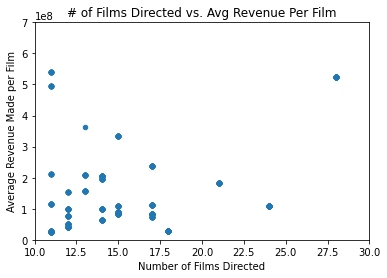

In [22]:
ax = df_scatter.plot(x='count', y='revenue_adj_y', kind='scatter')
ax.set_xlim(10, 30)
ax.set_ylim(0, 700000000)
plt.xlabel('Number of Films Directed')
plt.ylabel('Average Revenue Made per Film')
plt.title('# of Films Directed vs. Avg Revenue Per Film')

What this scatter plot shows is that there is little to no correlation on the number of films made with the amount made per film. Some directors such as Peter Jackson and Michael Bay have made relatively few films, but make tons of money. On the other hand, directors such as Clint Eastwodd and Woody Allen have made many films, but relatively low amount of revenue on their films.

<a id='conclusions'></a>
## Conclusions

According to my data, Peter Jackson is the highest earner for his films, followed by Stephen Speilberg. This isn't too surprising since Jackson directed the Lord of The Rings franchise which naturally would boost up his average, while Speilberg has directed many classic films suc as Jaws and and Raiders of the Lost Ark.

What I did find a bit surprising was that number of films directed had little impact on the revenue made. My reasoning fo why I thought a director who made many films such as Stephen Speilberg or Ridley Scott, would naturally get a higher revenue than a less well known director, based on name recognition. What I did not take into account was that I intentionally only included directors who have made 10 or more films, and virtually all of them were well established directors at this point. If I were to include every director in my scatter, I think the results would show that a higher count, would result in higher revenue. In all likelyhood there is a correlation between the number of films directed and average revenue, however the correlation disappears, when you only consider well known directors.

The one issue with my project is that about half of the data had the revenue_adj at zero, which meant all that data had to be dropped.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255